# Table of Contents
 <p>

In [10]:
#https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras/

In [11]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt
import numpy

1.9.0


In [12]:
mnist = tf.keras.datasets.mnist #28x28 images of hand-written digits 0-9

# note pixel data is normally between
# 0-255

In [13]:
# idea
# feed through the pixel values through a neural network
# and have the network classify what digit it thinks it is.

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# we will normalise between 0 and 1
# makes it easier for the network to learn.
# I think it has something to do with the size of the gradients.

# not sure why we choose axis = 1 though

print(x_train.shape)

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

(60000, 28, 28)


In [15]:
print(numpy.array(x_train[0]).shape)
print(numpy.array(x_train[0]).min())
print(numpy.array(x_train[0]).max())

(28, 28)
0.0
0.92705966211359


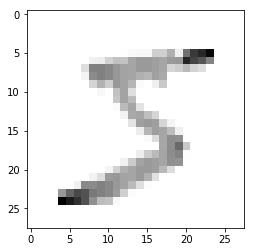

In [16]:
plt.figure()
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [85]:
# build the model
# sequential models - feed forward networks
model = tf.keras.models.Sequential()
# as our input we will not use a 2D array/image but instead
# convert it to a 1D array. We could use np.reshape but
# we will use Keras' Flatten
# input layer
# model.add(tf.keras.layers.Flatten()) # this doesn't work with tf==1.9 when you try to load model!
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) # this works though
# next, two hidden layers
# Dense( number of neurons, activation function )
# relu is 0 before x=0 and then linear for x>0
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# output layer
# will out the number of classifications - in our case this is 10. numbers 0-9
# activation will be softmax, smooth between 0 and 1.
# because we want a 'probability' output
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# here we have now finished the architecture of our model.

# now we need to define some parameters for the training of the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

In [86]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 3s 58us/step - loss: 0.3096 - acc: 0.9140
Epoch 2/3
60000/60000 [==============================] - 3s 50us/step - loss: 0.1407 - acc: 0.9589
Epoch 3/3
60000/60000 [==============================] - 3s 55us/step - loss: 0.0966 - acc: 0.9718


In [88]:
# now lets compute the validation loss and the validation accuracy
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 33us/step
0.10451066228710115 0.969


In [89]:
# how to save model
model.save('number_reader.model')

In [90]:
new_model = tf.keras.models.load_model('number_reader.model')

In [91]:
predictions = new_model.predict([x_test])

In [92]:
# what does predictions do?
# well it reads in 28x28 pixel array and returns
# a list of probabilities classifying the 'image'
# as being being 0-9

In [93]:
predictions[0]

array([8.9213870e-08, 1.9778799e-08, 3.0874700e-05, 6.2482170e-04,
       6.7859554e-09, 3.2772066e-06, 6.5300508e-12, 9.9932301e-01,
       4.2130036e-06, 1.3674054e-05], dtype=float32)

In [95]:
numpy.argmax(predictions[0])

7

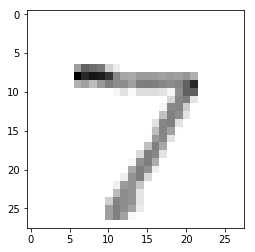

In [96]:
plt.figure()
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()

In [97]:
y_test.shape

(10000,)

In [98]:
# find incorrect cases
bad=[]
for i in range(len(y_test)):
    if y_test[i] != numpy.argmax(predictions[i]):
        bad.append(i)

In [99]:
len(bad)

310

In [100]:
bad[0]

8

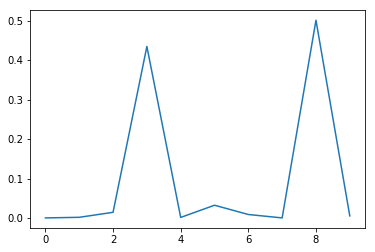

In [101]:
plt.figure()
plt.plot(predictions[18])
plt.show()

In [102]:
numpy.argmax(predictions[18])

8

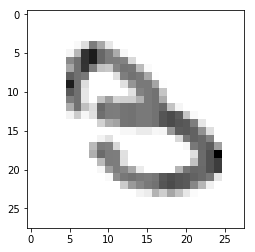

In [103]:
plt.figure()
plt.imshow(x_test[18], cmap=plt.cm.binary)
plt.show()